<a href="https://colab.research.google.com/github/TheOnlylight/C/blob/master/BrainExplanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Brain Pulse analysis from fMRI aspect

*this project and its thory are inspired by the SPM fMRI*

By reading the source code of the 1st level analysis, it is not hard to find that the regressor X in $Y = X \times B + \epsilon$ is generated using the *spm_Volterra.m* this function is in charge of 
```
% Generalized convolution of inputs (U) with basis set (bf)
% FORMAT [X,Xname,Fc] = spm_Volterra(U,bf,V)
% U          -  input structure array (see spm_get_ons.m)
% bf         -  Basis functions (see spm_get_bf.m)
% V          -  [1 or 2] order of Volterra expansion [default = 1]
%
% X          -  Design Matrix
% Xname      -  names of regressors [columns] in X
% Fc(i).i    -  indices pertaining to input i (and interactions)
% Fc(i).name -  names pertaining to input i   (and interactions)
% Fc(i).p    -  grouping of regressors per parameter
%__________________________________________________________________________
%
% For first order expansions spm_Volterra simply convolves the causes (e.g.
% stick functions) in U.u by the basis functions in bf to create a design
% matrix X.  For second order expansions new entries appear in X, Xname and
% Fc that correspond to the interaction among the original causes. The
% basis functions for these effects are two dimensional and are used to
% assemble the second order kernel in spm_graph.m. Second order effects are
% computed for only the first column of U.u.
```
this function requries bf --> bf         -  Basis functions (see spm_get_bf.m)

the function *spm_get_bf.m* is in charge of generating the original pulse function.
```
% Fill in basis function structure
% FORMAT [xBF] = spm_get_bf(xBF)
%
% xBF.dt      - time bin length {seconds}
% xBF.name    - description of basis functions specified
%               'hrf'
%               'hrf (with time derivative)'
%               'hrf (with time and dispersion derivatives)'
%               'Fourier set'
%               'Fourier set (Hanning)'
%               'Gamma functions'
%               'Finite Impulse Response'
%               (any other specification will default to 'hrf')
% xBF.length  - window length (seconds)
% xBF.order   - order
% xBF.T       - microtime resolution (for 'hrf*')
%
% xBF.bf      - array of basis functions
%__________________________________________________________________________
%
% spm_get_bf prompts for basis functions to model event or epoch-related
% responses.  The basis functions returned are unitary and orthonormal
% when defined as a function of peri-stimulus time in time-bins.
% It is at this point that the distinction between event and epoch-related 
% responses enters.
```

and if we go a step further we will find the function in charge of generating hemodynamic function.
```
function [hrf,p] = spm_hrf(RT,P,T)
% Return a hemodynamic response function
% FORMAT [hrf,p] = spm_hrf(RT,p,T)
% RT   - scan repeat time
% p    - parameters of the response function (two Gamma functions)
%
%                                                           defaults
%                                                          (seconds)
%        p(1) - delay of response (relative to onset)          6
%        p(2) - delay of undershoot (relative to onset)       16
%        p(3) - dispersion of response                         1
%        p(4) - dispersion of undershoot                       1
%        p(5) - ratio of response to undershoot                6
%        p(6) - onset (seconds)                                0
%        p(7) - length of kernel (seconds)                    32
%
% T    - microtime resolution [Default: 16]
%
% hrf  - hemodynamic response function
% p    - parameters of the response function
%__________________________________________________________________________
% Copyright (C) 1996-2014 Wellcome Trust Centre for Neuroimaging

% Karl Friston
% $Id: spm_hrf.m 6108 2014-07-16 15:24:06Z guillaume $


%-Parameters of the response function
```
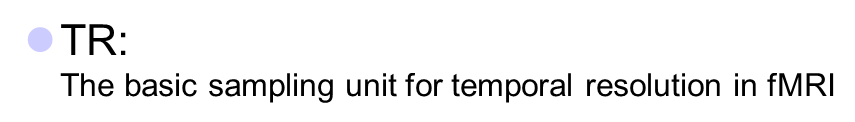
however the two seems the same thing

In [32]:
def spm_Gpdf(x=None,h=None,l=None,*args,**kwargs):
    varargin = spm_Gpdf.varargin
    nargin = spm_Gpdf.nargin

    # Probability Density Function (PDF) of Gamma distribution
# FORMAT f = spm_Gpdf(x,h,l)
    
    # x - Gamma-variate   (Gamma has range [0,Inf) )
# h - Shape parameter (h>0)
# l - Scale parameter (l>0)
# f - PDF of Gamma-distribution with shape & scale parameters h & l
#__________________________________________________________________________
    
    # spm_Gpdf implements the Probability Density Function of the Gamma
# distribution.
    
    # Definition:
#--------------------------------------------------------------------------
# The PDF of the Gamma distribution with shape parameter h and scale l
# is defined for h>0 & l>0 and for x in [0,Inf) by: (See Evans et al.,
# Ch18, but note that this reference uses the alternative
# parameterisation of the Gamma with scale parameter c=1/l)
    
    #           l^h * x^(h-1) exp(-lx)
#    f(x) = ----------------------
#                   gamma(h)
    
    # Variate relationships: (Evans et al., Ch18 & Ch8)
#--------------------------------------------------------------------------
# For natural (strictly +ve integer) shape h this is an Erlang distribution.
    
    # The Standard Gamma distribution has a single parameter, the shape h.
# The scale taken as l=1.
    
    # The Chi-squared distribution with v degrees of freedom is equivalent
# to the Gamma distribution with scale parameter 1/2 and shape parameter v/2.
    
    # Algorithm:
#--------------------------------------------------------------------------
# Direct computation using logs to avoid roundoff errors.
    
    # References:
#--------------------------------------------------------------------------
# Evans M, Hastings N, Peacock B (1993)
#       "Statistical Distributions"
#        2nd Ed. Wiley, New York
    
    # Abramowitz M, Stegun IA, (1964)
#       "Handbook of Mathematical Functions"
#        US Government Printing Office
    
    # Press WH, Teukolsky SA, Vetterling AT, Flannery BP (1992)
#       "Numerical Recipes in C"
#        Cambridge
#__________________________________________________________________________
# Copyright (C) 1993-2011 Wellcome Trust Centre for Neuroimaging
    
    # Andrew Holmes
# $Id: spm_Gpdf.m 4182 2011-02-01 12:29:09Z guillaume $
    
    #-Format arguments, note & check sizes
#--------------------------------------------------------------------------
#     if nargin < 3:
#         error('Insufficient arguments')
    
#     ad=concat([[ndims(x)],[ndims(h)],[ndims(l)]])
# # spm_Gpdf.m:63
#     rd=max(ad)
# # spm_Gpdf.m:64
#     as=concat([[concat([size(x),ones(1,rd - ad(1))])],[concat([size(h),ones(1,rd - ad(2))])],[concat([size(l),ones(1,rd - ad(3))])]])
# # spm_Gpdf.m:65
#     rs=max(as)
# # spm_Gpdf.m:68
#     xa=prod(as,2) > 1
# # spm_Gpdf.m:69
#     if sum(xa) > 1 and any(any(diff(as(xa,arange())),1)):
#         error('non-scalar args must match in size')
    
    #-Computation
#--------------------------------------------------------------------------
#-Initialise result to zeros
    f=zeros(rs)
# spm_Gpdf.m:77
    #-Only defined for strictly positive h & l. Return NaN if undefined.
    md=(logical_and(ones(size(x)),h) > logical_and(0,l) > 0)
# spm_Gpdf.m:80
    if any(logical_not(ravel(md))):
        f[logical_not(md)]=NaN
# spm_Gpdf.m:82
        warning('Returning NaN for out of range arguments')
    
    #-Degenerate cases at x==0: h<1 => f=Inf; h==1 => f=l; h>1 => f=0
    ml=(logical_and(md,x) == logical_and(0,h) < 1)
# spm_Gpdf.m:87
    f[ml]=Inf
# spm_Gpdf.m:88
    ml=(logical_and(md,x) == logical_and(0,h) == 1)
# spm_Gpdf.m:89
    if xa(3):
        mll=copy(ml)
# spm_Gpdf.m:89
    else:
        mll=1
# spm_Gpdf.m:89
    
    f[ml]=l(mll)
# spm_Gpdf.m:90
    #-Compute where defined and x>0
    Q=find(logical_and(md,x) > 0)
# spm_Gpdf.m:93
    if isempty(Q):
        return f
    
    if xa(1):
        Qx=copy(Q)
# spm_Gpdf.m:95
    else:
        Qx=1
# spm_Gpdf.m:95
    
    if xa(2):
        Qh=copy(Q)
# spm_Gpdf.m:96
    else:
        Qh=1
# spm_Gpdf.m:96
    
    if xa(3):
        Ql=copy(Q)
# spm_Gpdf.m:97
    else:
        Ql=1
# spm_Gpdf.m:97
    
    #-Compute
    f[Q]=exp(multiply((h(Qh) - 1),log(x(Qx))) + multiply(h(Qh),log(l(Ql))) - multiply(l(Ql),x(Qx)) - gammaln(h(Qh)))
# spm_Gpdf.m:100

def spm_hrf(RT=None,P=None,T=16,*args,**kwargs):
    varargin = spm_hrf.varargin
    nargin = spm_hrf.nargin

    # Return a hemodynamic response function
# FORMAT [hrf,p] = spm_hrf(RT,p,T)
# RT   - scan repeat time
# p    - parameters of the response function (two Gamma functions)
    
    #                                                           defaults
#                                                          (seconds)
#        p(1) - delay of response (relative to onset)          6
#        p(2) - delay of undershoot (relative to onset)       16
#        p(3) - dispersion of response                         1
#        p(4) - dispersion of undershoot                       1
#        p(5) - ratio of response to undershoot                6
#        p(6) - onset (seconds)                                0
#        p(7) - length of kernel (seconds)                    32
    
    # T    - microtime resolution [Default: 16]
    
    # hrf  - hemodynamic response function
# p    - parameters of the response function
#__________________________________________________________________________
# Copyright (C) 1996-2014 Wellcome Trust Centre for Neuroimaging
    
    # Karl Friston
# $Id: spm_hrf.m 6108 2014-07-16 15:24:06Z guillaume $
    
    #-Parameters of the response function
#--------------------------------------------------------------------------
    p=concat([6,16,1,1,6,0,32])
# spm_hrf.m:30
    if nargin > 1:
        p[arange(1,length(P))]=P
# spm_hrf.m:32
    
    #-Microtime resolution
#--------------------------------------------------------------------------
    if nargin > 2:
        fMRI_T=copy(T)
# spm_hrf.m:38
    else:
        fMRI_T=spm_get_defaults('stats.fmri.t')
# spm_hrf.m:40 the default here is 16
    
    #-Modelled hemodynamic response function - {mixture of Gammas}
#--------------------------------------------------------------------------
    dt=RT / fMRI_T
# spm_hrf.m:45
    u=concat([arange(0,ceil(p(7) / dt))]) - p(6) / dt
# spm_hrf.m:46
    hrf=spm_Gpdf(u,p(1) / p(3),dt / p(3)) - spm_Gpdf(u,p(2) / p(4),dt / p(4)) / p(5)
# spm_hrf.m:47
    hrf=hrf(dot(concat([arange(0,floor(p(7) / RT))]),fMRI_T) + 1)
# spm_hrf.m:48
    hrf=hrf.T / sum(hrf)
# spm_hrf.m:49

The code above is the basic computation transferred directly from matlab

In [21]:
class xBF:
    def __init__(self,dt,name,length,order,T,bf):
        self.name = name
        self.dt = dt
        self.length = length
        self.order = order
        

In [25]:
sb = xBF(100,'hrf',1000,0,0.1,0)
print(sb.dt)

100


NameError: ignored